# PROJET 3PDQ

# Choses à faire : 

#### 220 observations

#### Sans le rééquilibrage des données

#### Sans imputation 

#### Faire un point des metrics de chaque modèle et les comparés (Maitriser les métrics en profondeur )

#### Pareille pour la courbe roc

#### Voir le calcul mathématique de chaque métrics 

### Installation des packages 

In [1]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("PDQ_3 -220observations.csv")
dataset

,N°de_Patient,Centre,Initiales,Sexe,Age,Date_Naissance,Date_visite1,Date_visite2,EVA_mean,EVA_max,...,HADa.5,HADd.5,HADa.6,HADd.6,HADa.7,HADd.7,Anxiété_Total,Depression_Total,Total_Score,Conformité_au_protocol
0,1,1,BM,M,71.0,juil.-46,2019/05/22,2019/05/22,50.0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,5.0,1
1,2,1,BM,M,49.0,sept.-69,2019/06/28,2019/06/28,35.0,80,...,0.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,7.0,1
2,3,1,NC,F,61.0,août-57,2019/07/05,2019/07/05,50.0,75,...,2.0,2.0,3.0,1.0,2.0,1.0,16.0,10.0,26.0,1
3,4,1,GE,F,65.0,juil.-53,2019/07/10,2019/07/10,54.0,80,...,1.0,0.0,2.0,1.0,2.0,0.0,11.0,6.0,17.0,1
4,5,1,ML,F,59.0,oct.-58,2019/07/17,2019/07/17,51.0,69,...,1.0,2.0,3.0,2.0,1.0,2.0,11.0,16.0,27.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,221,14,GM,F,65.0,mai-55,2022/03/10,2022/03/11,70.0,80,...,2.0,2.0,2.0,1.0,2.0,1.0,15.0,10.0,25.0,1
216,222,15,MM,M,76.0,févr.-45,2022/06/02,2022/06/02,80.0,100,...,0.0,0.0,2.0,0.0,0.0,1.0,4.0,3.0,7.0,1
217,223,15,PA,F,64.0,nov.-56,2022/06/21,2022/06/21,45.0,70,...,0.0,2.0,3.0,0.0,0.0,0.0,4.0,3.0,7.0,1
218,224,15,TL,M,60.0,févr.-61,2022/06/30,2022/06/30,40.0,70,...,2.0,0.0,0.0,2.0,2.0,0.0,10.0,7.0,17.0,1


In [3]:
dataset.shape

(220, 298)

In [4]:
print(dataset.columns.tolist())

['N°de_Patient', 'Centre ', 'Initiales', 'Sexe', 'Age', 'Date_Naissance', 'Date_visite1', 'Date_visite2', 'EVA_mean', 'EVA_max', 'Inclusion1', 'Inclusion2', 'Inclusion3', 'Inclusion4', 'Inclusion5', 'Inclusion6', 'Inclusion7', 'Non_Inclusion1', 'Non_Inclusion2', 'Non_Inclusion3', 'Non_Inclusion4', 'MOCA1', 'MOCA2', 'MOCA3', 'MOCA4', 'MOCA5', 'MOCA6', 'MOCA7', 'MOCA8', 'MOCA9', 'MOCA10', 'MOCA_Total', 'superieure_gauche', 'superieure_droite', 'inferieure_gauche', 'inferieure _droite', 'Tronc', 'tete', 'Localisation', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'item9', 'item10', 'item11', 'item12', 'item13', 'item14', 'item15', 'item16', 'item17', 'item18', 'item19', 'item20', 'item21', 'item22', 'item23', 'item24', 'item25', 'item26', 'item27', 'item28', 'item29', 'item30', 'item31', 'item32', 'item33', 'Douleur_Centrale', 'DN4.1', 'DN4.2', 'DN4.3', 'DN4.4', 'DN4.5', 'DN4.6', 'DN4.7', 'DN4.8', 'DN4.9', 'DN4.10', 'DN4.Total', 'KPPS1_s', 'KPPS1_f', 'Domain1_To

In [5]:
df= dataset[['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'item9', 'item10', 'item11', 'item12', 'item13', 'item14', 'item15', 'item16', 'item17', 'item18', 
'item19', 'item20', 'item21', 'item22', 'item23', 'item24', 'item25', 'item26', 'item27', 'item28','Douleur_Centrale']]
df

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,...,item20,item21,item22,item23,item24,item25,item26,item27,item28,Douleur_Centrale
0,0.0,1.0,1,0.0,1,0,1.0,0,0.0,0,...,0,0,1,1,0,1,0,0,0,1
1,1.0,0.0,0,1.0,0,0,1.0,1,0.0,0,...,0,0,1,1,1,1,1,0,0,1
2,0.0,0.0,0,0.0,1,0,1.0,0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.0,1.0,1,0.0,0,0,1.0,0,1.0,0,...,0,0,0,1,1,0,0,0,0,0
4,1.0,0.0,1,1.0,1,0,0.0,1,0.0,0,...,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.0,1.0,1,0.0,0,0,1.0,1,0.0,0,...,0,0,1,1,1,1,1,0,0,0
216,1.0,1.0,1,0.0,1,0,1.0,0,0.0,0,...,0,0,0,1,1,1,0,1,0,1
217,0.0,0.0,0,0.0,0,0,0.0,0,1.0,1,...,0,0,0,1,1,0,0,0,0,1
218,0.0,0.0,0,0.0,1,0,0.0,1,0.0,1,...,0,0,1,1,1,1,1,1,0,1


In [6]:
df.shape

(220, 29)

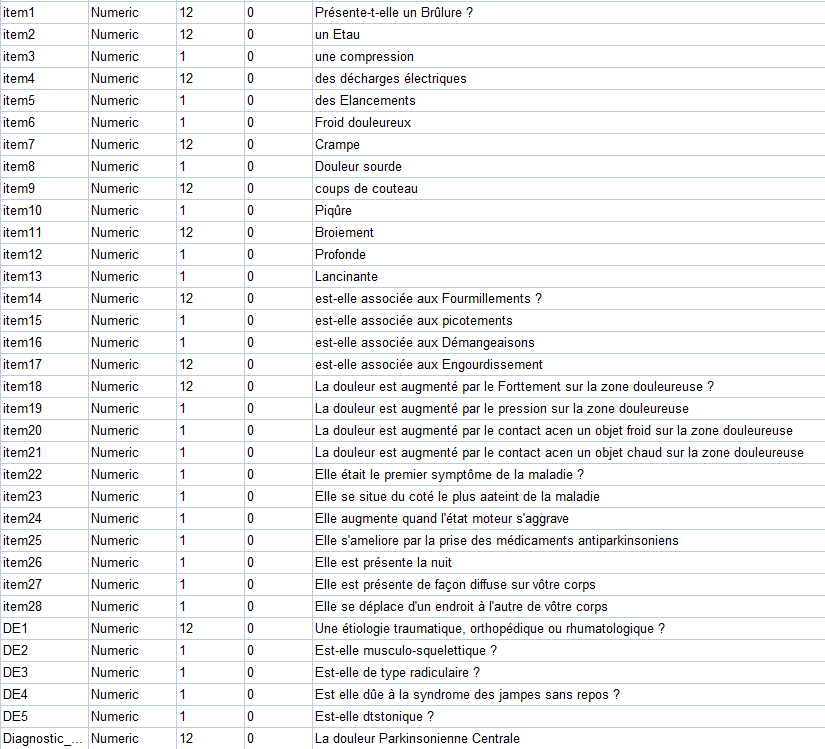

In [7]:
from IPython.display import Image

# Afficher l'image
Image(filename="C:/Users/aliah/Downloads/Capture d’écran 2023-04-21 140544.png")

### Vérifier le type de chaque variable 

In [8]:
df.select_dtypes(object).columns

Index(['item3', 'item5', 'item6', 'item8', 'item10', 'item12', 'item13',
       'item15', 'item16', 'item19', 'item20', 'item21', 'item22', 'item23',
       'item24', 'item25', 'item26', 'item27', 'item28'],
      dtype='object')

### Conversion de toutes les variables en float

In [9]:
# Parcours de chaque colonne du DataFrame
for column in df.columns:
    # Conversion de la colonne en type float en ignorant les erreurs de conversion
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Afficher les types de données des colonnes
print(df.dtypes)

item1               float64
item2               float64
item3               float64
item4               float64
item5               float64
item6               float64
item7               float64
item8               float64
item9               float64
item10              float64
item11              float64
item12              float64
item13              float64
item14              float64
item15              float64
item16              float64
item17              float64
item18              float64
item19              float64
item20              float64
item21              float64
item22              float64
item23              float64
item24              float64
item25              float64
item26              float64
item27              float64
item28              float64
Douleur_Centrale      int64
dtype: object


In [10]:
# Parcours de chaque colonne du DataFrame
for column in df.columns:
    # Conversion de la colonne en type float
    df[column] = df[column].astype(float)

# Afficher les types de données des colonnes
print(df.dtypes)

item1               float64
item2               float64
item3               float64
item4               float64
item5               float64
item6               float64
item7               float64
item8               float64
item9               float64
item10              float64
item11              float64
item12              float64
item13              float64
item14              float64
item15              float64
item16              float64
item17              float64
item18              float64
item19              float64
item20              float64
item21              float64
item22              float64
item23              float64
item24              float64
item25              float64
item26              float64
item27              float64
item28              float64
Douleur_Centrale    float64
dtype: object


# Gestion des données manquantes

In [11]:
#Compter le nombre de valeurs manquantes par variable
missing_values_count = df.isnull().sum()

# Afficher le nombre de valeurs manquantes par variable
print("Nombre de valeurs manquantes par variable :\n", missing_values_count)

# Afficher les variables qui contiennent des valeurs manquantes
missing_variables = df.columns[df.isnull().any()].tolist()
print("\nVariables avec des valeurs manquantes :", missing_variables)

Nombre de valeurs manquantes par variable :
 item1               3
item2               3
item3               3
item4               3
item5               5
item6               5
item7               2
item8               3
item9               3
item10              4
item11              3
item12              5
item13              4
item14              1
item15              2
item16              2
item17              1
item18              2
item19              3
item20              2
item21              3
item22              3
item23              4
item24              6
item25              3
item26              3
item27              4
item28              2
Douleur_Centrale    0
dtype: int64

Variables avec des valeurs manquantes : ['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'item9', 'item10', 'item11', 'item12', 'item13', 'item14', 'item15', 'item16', 'item17', 'item18', 'item19', 'item20', 'item21', 'item22', 'item23', 'item24', 'item25', 'item26', 'item27', '

In [12]:
df.isnull().sum().sum()

87

In [13]:
# Calculer le nombre total de cellules dans le DataFrame
total_cells = df.shape[0] * df.shape[1]
total_cells

6380

In [14]:
# Calculer le nombre total de valeurs manquantes dans le DataFrame
total_missing = df.isnull().sum().sum()

# Calculer la proportion totale de valeurs manquantes dans le DataFrame
proportion_missing = total_missing / total_cells * 100

# Afficher la proportion totale de valeurs manquantes en pourcentage
print('Proportion totale de valeurs manquantes : {:.2f}%'.format(proportion_missing))

Proportion totale de valeurs manquantes : 1.36%


In [15]:
proportion_missing /100

0.013636363636363636

In [16]:
# Suppression des données manquantes 
df = df.dropna()
#Vérifier à nouveau
df.isnull().sum().sum()

0

In [17]:
df.shape

(200, 29)

In [18]:
df

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,...,item20,item21,item22,item23,item24,item25,item26,item27,item28,Douleur_Centrale
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
216,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
218,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


### HEATMAP

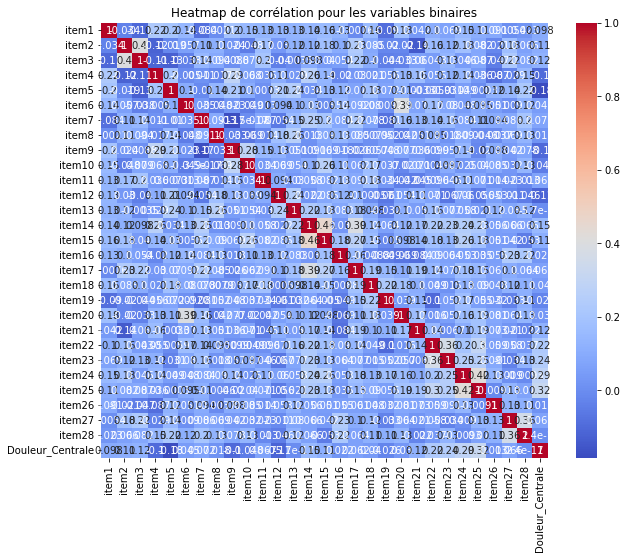

In [19]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Plot du heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de corrélation pour les variables binaires')
plt.show()

# MODELISATION

In [20]:
# 1) Créer une matrice des variables indépendantes et le vecteur de la variable dépendante.
# X est la matrice et Y est le vecteur
# La matrice des variables indépendantes est aussi appeelée matrice de featuresµ

X = df.drop('Douleur_Centrale', axis=1)  # Supprimer la colonne "target" de la matrice X
Y = df['Douleur_Centrale']              # Sélectionner uniquement la colonne "target" pour Y

In [21]:
X

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,...,item19,item20,item21,item22,item23,item24,item25,item26,item27,item28
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
216,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
218,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [22]:
Y

0      1.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
215    0.0
216    1.0
217    1.0
218    1.0
219    1.0
Name: Douleur_Centrale, Length: 200, dtype: float64

### Séparation du dataset en training_set et en test_set

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state= 0)

# Calculer la proportion de chaque ensemble
train_prop = len(X_train) / len(X)
test_prop = len(X_test) / len(X)

print("Proportion de données dans l'ensemble d'entraînement: {:.2f}".format(train_prop))
print("Proportion de données dans l'ensemble de test: {:.2f}".format(test_prop))

Proportion de données dans l'ensemble d'entraînement: 0.67
Proportion de données dans l'ensemble de test: 0.34


# 1- Regression Logistique 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Créer une instance du modèle de régression logistique
RL = LogisticRegression()

# Créer une instance de RFE avec le modèle de régression logistique
rfe = RFE(estimator=RL, n_features_to_select=6)

# Adapter RFE sur les données d'entraînement
rfe.fit(X_train, Y_train)

# Obtenir les indices des fonctionnalités sélectionnées
selected_features_indices = rfe.get_support(indices=True)

# Obtenir les noms des fonctionnalités sélectionnées
selected_features_names = X_train.columns[selected_features_indices]

# Entraîner le modèle de régression logistique sur les fonctionnalités sélectionnées
RL.fit(X_train[selected_features_names], Y_train)

# Afficher les variables du feature selection
print("Variables du feature selection : ")
print(selected_features_names)

Variables du feature selection : 
Index(['item4', 'item5', 'item19', 'item24', 'item25', 'item27'], dtype='object')


In [25]:
# Prédire les classes pour les données de test
Y_pred1 = rfe.predict(X_test)
Y_pred1

array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.])

In [26]:
from sklearn.metrics import confusion_matrix
CM1 = confusion_matrix(Y_test, Y_pred1)
CM1

array([[32, 10],
       [15, 10]], dtype=int64)

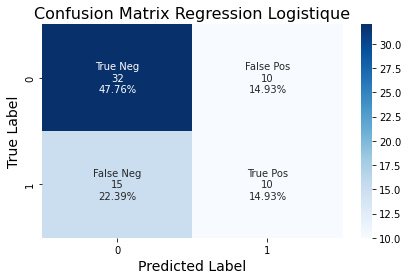

In [27]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM1.flatten()/np.sum(CM1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM1, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix Regression Logistique', fontsize=16)
plt.tight_layout()
plt.show()


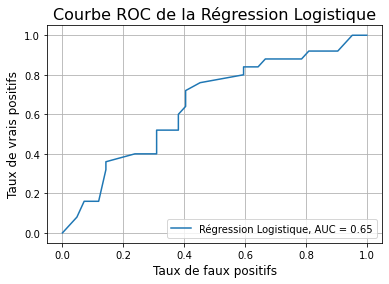

In [28]:
from sklearn import metrics

y_pred_proba1 = rfe.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba1)
auc = metrics.roc_auc_score(Y_test, y_pred_proba1)

plt.plot(fpr, tpr, label="Régression Logistique, AUC = {:.2f}".format(auc))
plt.legend(loc="lower right")
plt.title('Courbe ROC de la Régression Logistique', fontsize=16)
plt.xlabel('Taux de faux positifs', fontsize=12)
plt.ylabel('Taux de vrais positifs', fontsize=12)
plt.grid(True)
plt.show()

In [29]:
# Calculer les taux de faux positifs et de vrais positifs
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba1)

# Calculer les scores en utilisant les taux de vrais positifs et les taux de faux positifs
scores = tpr - fpr

# Trouver l'indice du score maximum
best_index = np.argmax(scores)

# Obtenir le seuil de classification correspondant au score maximum
best_threshold = thresholds[best_index]

# Afficher les scores individuellement
for score, threshold in zip(scores, thresholds):
    print("Score : {:.2f}, Seuil : {:.2f}".format(score, threshold))

# Afficher le score maximum et le seuil correspondant
print("Meilleur score : {:.2f}".format(scores[best_index]))
print("Seuil correspondant : {:.2f}".format(best_threshold))

Score : 0.00, Seuil : 1.82
Score : 0.02, Seuil : 0.82
Score : 0.03, Seuil : 0.71
Score : 0.09, Seuil : 0.65
Score : 0.04, Seuil : 0.59
Score : 0.18, Seuil : 0.56
Score : 0.22, Seuil : 0.51
Score : 0.16, Seuil : 0.50
Score : 0.14, Seuil : 0.49
Score : 0.09, Seuil : 0.49
Score : 0.13, Seuil : 0.49
Score : 0.21, Seuil : 0.45
Score : 0.19, Seuil : 0.44
Score : 0.14, Seuil : 0.38
Score : 0.22, Seuil : 0.35
Score : 0.24, Seuil : 0.35
Score : 0.32, Seuil : 0.34
Score : 0.31, Seuil : 0.30
Score : 0.20, Seuil : 0.26
Score : 0.24, Seuil : 0.25
Score : 0.20, Seuil : 0.24
Score : 0.21, Seuil : 0.22
Score : 0.19, Seuil : 0.20
Score : 0.09, Seuil : 0.15
Score : 0.11, Seuil : 0.15
Score : 0.02, Seuil : 0.12
Score : 0.05, Seuil : 0.09
Score : 0.00, Seuil : 0.07
Meilleur score : 0.32
Seuil correspondant : 0.34


Precision : 0.50
Recall : 0.40
Accuracy rate:  0.6268656716417911
Error rate:  0.3731343283582089
F1_score:  0.4444444444444445
CK: 0.1687344913151364
MC: 0.171115891808986
AUC: 0.6490476190476191


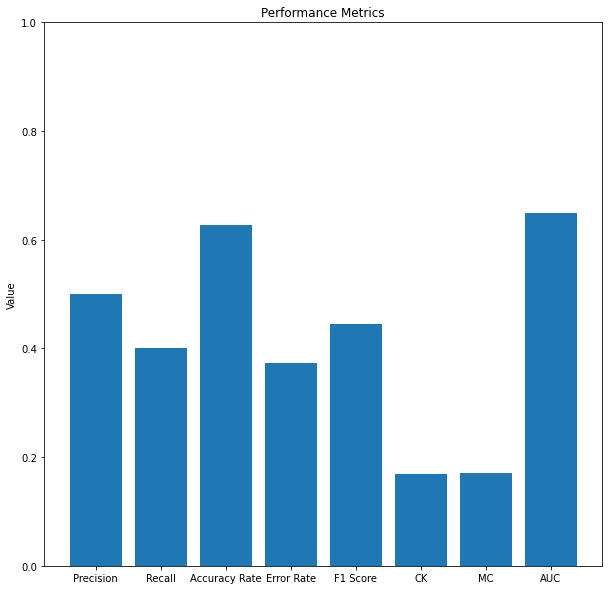

In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, matthews_corrcoef

Accuracy_Rate1 = accuracy_score(Y_test, Y_pred1)
Error_rate1 = 1 - Accuracy_Rate1
F1_score1 = f1_score(Y_test, Y_pred1)
Precision1 = precision_score(Y_test, Y_pred1)
Recall1 = recall_score(Y_test, Y_pred1)
CK1 = cohen_kappa_score (Y_test,Y_pred1)
MC1 = matthews_corrcoef(Y_test,Y_pred1)
auc1 = metrics.roc_auc_score(Y_test, y_pred_proba1)

print("Precision : {:.2f}".format(Precision1))
print("Recall : {:.2f}".format(Recall1))
print("Accuracy rate: ", Accuracy_Rate1)
print("Error rate: ", Error_rate1)
print("F1_score: ", F1_score1)
print("CK:", CK1)
print("MC:", MC1)
print("AUC:", auc1)


# create a list of metric names and values
metric_names = ["Precision", "Recall", "Accuracy Rate", "Error Rate", "F1 Score", "CK", "MC","AUC"]
metric_values = [Precision1, Recall1, Accuracy_Rate1, Error_rate1, F1_score1, CK1, MC1,auc1]

# create a bar chart
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(metric_names, metric_values)
ax.set_ylabel('Value')
ax.set_ylim([0,1])
ax.set_title('Performance Metrics')
plt.show()

# 2- Random Forest 

In [31]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# Convertir X_train en tableau NumPy
X_train_np = X_train.values

# Créer une instance du modèle Random Forest
RF = RandomForestClassifier(n_estimators=100000, n_jobs=1, max_depth=2,random_state = 0)

# Créer une instance de Boruta
feat_selector = BorutaPy(RF, n_estimators='auto', max_iter=100, verbose=2, random_state = 0)
# Adapter Boruta sur les données d'entraînement
feat_selector.fit(X_train_np, Y_train)

# Obtenir les indices des fonctionnalités sélectionnées
selected_features_indices = feat_selector.support_

# Sélectionner les fonctionnalités avec Boruta
selected_features = X_train.columns[feat_selector.support_]

# Adapter le modèle Random Forest sur les fonctionnalités sélectionnées
RF.fit(X_train[selected_features], Y_train)

# Afficher les variables du feature selection
print("Variables du feature selection : ")
print(selected_features_names)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	19
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	19
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	19
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	19
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	19
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	19
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	19
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	19
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	19
I

In [32]:
# Prédire les classes pour les données de test en utilisant les mêmes fonctionnalités sélectionnées
Y_pred2 = RF.predict(X_test[selected_features])

# Afficher les prédictions
print(Y_pred2)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [33]:
CM2 = confusion_matrix(Y_test, Y_pred2)
CM2

array([[39,  3],
       [19,  6]], dtype=int64)

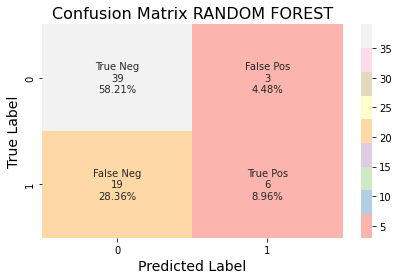

In [34]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM2.flatten()/np.sum(CM2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM2, annot=labels, fmt='', cmap='Pastel1')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix RANDOM FOREST', fontsize=16)
plt.tight_layout()
plt.show()

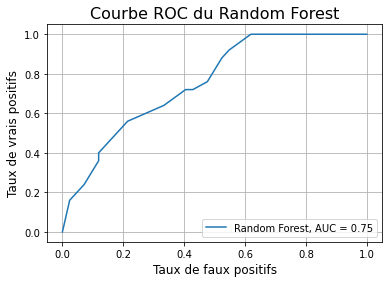

In [35]:
y_pred_proba2 = RF.predict_proba(X_test[selected_features])[:, 1]

# Calculer les taux de faux positifs et de vrais positifs
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba2)

auc2 = metrics.roc_auc_score(Y_test, y_pred_proba2)

plt.plot(fpr, tpr, label="Random Forest, AUC = {:.2f}".format(auc2))
plt.legend(loc="lower right")
plt.title('Courbe ROC du Random Forest', fontsize=16)
plt.xlabel('Taux de faux positifs', fontsize=12)
plt.ylabel('Taux de vrais positifs', fontsize=12)
plt.grid(True)
plt.show()

In [36]:
# Calculer le score pour y_pred_proba2
score = metrics.roc_auc_score(Y_test, y_pred_proba2)

# Afficher le score
print("Score pour y_pred_proba2 : {:.2f}".format(score))

Score pour y_pred_proba2 : 0.75


Pour calculer le score, la fonction roc_auc_score compare les probabilités prédites (y_pred_proba2) avec les vraies étiquettes de classe (Y_test). Elle calcule ensuite l'aire sous la courbe ROC en intégrant le taux de vrais positifs par rapport au taux de faux positifs sur toute la plage des seuils de classification.

Ce score est une mesure de la capacité du modèle à classer correctement les instances des deux classes, en prenant en compte à la fois la sensibilité (capacité à détecter les vrais positifs) et la spécificité (capacité à éviter les faux positifs).

### Présenter toujours la courbe roc avec l'indice du score maximum et le seuil de classification et les couples de spécificité et de sensiblité 

In [37]:
# Calculer les taux de faux positifs et de vrais positifs
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba2)

# Calculer les scores en utilisant les taux de vrais positifs et les taux de faux positifs
scores = tpr - fpr

# Trouver l'indice du score maximum
best_index = np.argmax(scores)

# Obtenir le seuil de classification correspondant au score maximum
best_threshold = thresholds[best_index]

# Afficher les scores individuellement
for score, threshold in zip(scores, thresholds):
    print("Score : {:.2f}, Seuil : {:.2f}".format(score, threshold))

# Afficher le score maximum et le seuil correspondant
print("Meilleur score : {:.2f}".format(scores[best_index]))
print("Seuil correspondant : {:.2f}".format(best_threshold))

Score : 0.00, Seuil : 1.58
Score : 0.14, Seuil : 0.58
Score : 0.17, Seuil : 0.54
Score : 0.24, Seuil : 0.50
Score : 0.28, Seuil : 0.46
Score : 0.35, Seuil : 0.46
Score : 0.31, Seuil : 0.41
Score : 0.32, Seuil : 0.40
Score : 0.29, Seuil : 0.32
Score : 0.28, Seuil : 0.32
Score : 0.36, Seuil : 0.31
Score : 0.37, Seuil : 0.28
Score : 0.38, Seuil : 0.22
Score : 0.17, Seuil : 0.20
Score : 0.07, Seuil : 0.17
Score : 0.00, Seuil : 0.09
Meilleur score : 0.38
Seuil correspondant : 0.22


Spécificité: 1.00, Sensibilité: 0.00
Spécificité: 0.98, Sensibilité: 0.16
Spécificité: 0.93, Sensibilité: 0.24
Spécificité: 0.88, Sensibilité: 0.36
Spécificité: 0.88, Sensibilité: 0.40
Spécificité: 0.79, Sensibilité: 0.56
Spécificité: 0.67, Sensibilité: 0.64
Spécificité: 0.60, Sensibilité: 0.72
Spécificité: 0.57, Sensibilité: 0.72
Spécificité: 0.52, Sensibilité: 0.76
Spécificité: 0.48, Sensibilité: 0.88
Spécificité: 0.45, Sensibilité: 0.92
Spécificité: 0.38, Sensibilité: 1.00
Spécificité: 0.17, Sensibilité: 1.00
Spécificité: 0.07, Sensibilité: 1.00
Spécificité: 0.00, Sensibilité: 1.00


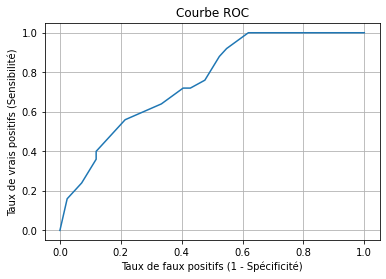

Aire sous la courbe ROC (AUC) : 0.75


In [38]:
# Calculer les taux de faux positifs et de vrais positifs
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba2)

# Calculer la spécificité
specificity = 1 - fpr

# Afficher les couples de spécificité et de sensibilité
for spec, sens in zip(specificity, tpr):
    print("Spécificité: {:.2f}, Sensibilité: {:.2f}".format(spec, sens))

# Tracer la courbe ROC
plt.plot(fpr, tpr)
plt.xlabel('Taux de faux positifs (1 - Spécificité)')
plt.ylabel('Taux de vrais positifs (Sensibilité)')
plt.title('Courbe ROC')
plt.grid(True)
plt.show()

# Calculer l'aire sous la courbe ROC (AUC)
auc = metrics.roc_auc_score(Y_test, y_pred_proba2)

# Afficher la valeur de l'aire sous la courbe ROC
print("Aire sous la courbe ROC (AUC) : {:.2f}".format(auc))

In [39]:
# Définir le seuil
seuil = 0.5

# Calculer les vrais positifs, les faux positifs, les vrais négatifs et les faux négatifs
vrais_positifs = np.sum((Y_test == 1) & (y_pred_proba2 >= seuil))
faux_negatifs = np.sum((Y_test == 1) & (y_pred_proba2 < seuil))
vrais_negatifs = np.sum((Y_test == 0) & (y_pred_proba2 < seuil))
faux_positifs = np.sum((Y_test == 0) & (y_pred_proba2 >= seuil))

# Calculer la sensibilité (rappel)
sensibilite = vrais_positifs / (vrais_positifs + faux_negatifs)

# Calculer la spécificité
specificite = vrais_negatifs / (vrais_negatifs + faux_positifs)

# Afficher les valeurs de sensibilité et de spécificité
print("Sensibilité (Rappel) : {:.2f}".format(sensibilite))
print("Spécificité : {:.2f}".format(specificite))

Sensibilité (Rappel) : 0.24
Spécificité : 0.93


In [40]:
# Définir le seuil
seuil = 0.22

# Calculer les vrais positifs, les faux positifs, les vrais négatifs et les faux négatifs
vrais_positifs = np.sum((Y_test == 1) & (y_pred_proba2 >= seuil))
faux_negatifs = np.sum((Y_test == 1) & (y_pred_proba2 < seuil))
vrais_negatifs = np.sum((Y_test == 0) & (y_pred_proba2 < seuil))
faux_positifs = np.sum((Y_test == 0) & (y_pred_proba2 >= seuil))

# Calculer la sensibilité (rappel)
sensibilite = vrais_positifs / (vrais_positifs + faux_negatifs)

# Calculer la spécificité
specificite = vrais_negatifs / (vrais_negatifs + faux_positifs)

# Afficher les valeurs de sensibilité et de spécificité
print("Sensibilité (Rappel) : {:.2f}".format(sensibilite))
print("Spécificité : {:.2f}".format(specificite))

Sensibilité (Rappel) : 1.00
Spécificité : 0.38


Precision : 0.67
Recall OU SENSIBILITE: 0.24
Accuracy rate:  0.6716417910447762
Error rate :  0.32835820895522383
F1_score:  0.3529411764705882
CK: 0.19365426695842458
MC: 0.2390800650495668
AUC: 0.7538095238095238


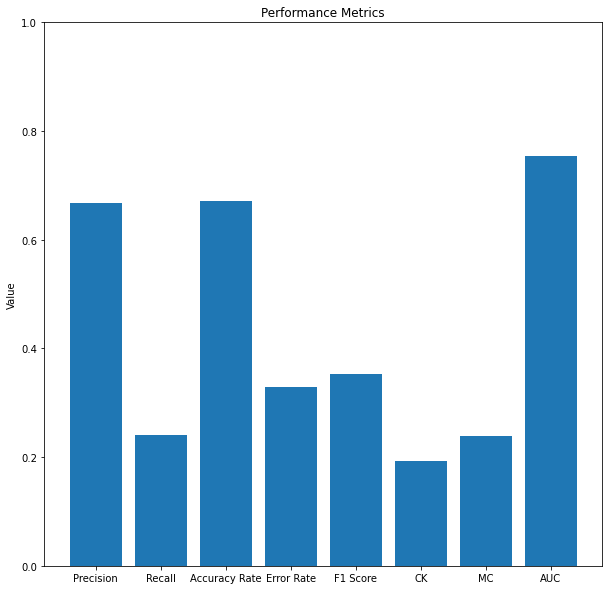

In [41]:
Accuracy_Rate2 = accuracy_score(Y_test, Y_pred2)
Error_rate2 = 1 - Accuracy_Rate2
F1_score2 = f1_score(Y_test, Y_pred2)
Precision2 = precision_score(Y_test, Y_pred2)
Recall2 = recall_score(Y_test, Y_pred2)
CK2 = cohen_kappa_score (Y_test,Y_pred2)
MC2 = matthews_corrcoef(Y_test,Y_pred2)
auc2 = metrics.roc_auc_score(Y_test, y_pred_proba2)

print("Precision : {:.2f}".format(Precision2))
print("Recall OU SENSIBILITE: {:.2f}".format(Recall2))
print("Accuracy rate: ", Accuracy_Rate2)
print("Error rate : ",Error_rate2)
print("F1_score: ", F1_score2)
print("CK:", CK2)
print("MC:", MC2)
print("AUC:", auc2)


# create a list of metric names and values
metric_names = ["Precision", "Recall", "Accuracy Rate", "Error Rate", "F1 Score", "CK", "MC","AUC"]
metric_values = [Precision2, Recall2, Accuracy_Rate2, Error_rate2, F1_score2, CK2, MC2,auc2]

# create a bar chart
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(metric_names, metric_values)
ax.set_ylabel('Value')
ax.set_ylim([0,1])
ax.set_title('Performance Metrics')
plt.show()

# 3- Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

# Créer une instance du modèle Gradient Boosting
GB = GradientBoostingClassifier(n_estimators=100000, max_depth=3, min_samples_leaf = 1 ,learning_rate = 0.1, random_state = 0)

# Créer une instance de Boruta
feat_selector = BorutaPy(GB, n_estimators='auto', verbose=2, random_state = 0)

# Adapter Boruta sur les données d'entraînement
feat_selector.fit(X_train.values, Y_train)

# Obtenir les indices des fonctionnalités sélectionnées
selected_features_indices = feat_selector.support_

# Sélectionner les fonctionnalités avec Boruta
selected_features = X_train.columns[selected_features_indices]

# Adapter le modèle Gradient Boosting sur les fonctionnalités sélectionnées
GB.fit(X_train[selected_features], Y_train)

# Afficher les variables du feature selection
print("Variables du feature selection : ")
print(selected_features)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	23
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	23
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	23
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	23
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	23
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	23
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	23
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	23
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	23
I

In [43]:
# Prédire les classes pour les données de test
Y_pred3 = GB.predict(X_test[selected_features])

# Afficher les prédictions
print(Y_pred3)

[1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.]


In [44]:
CM3 = confusion_matrix(Y_test, Y_pred3)
CM3

array([[27, 15],
       [ 9, 16]], dtype=int64)

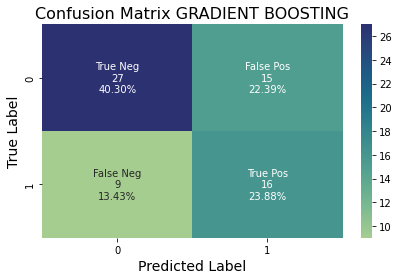

In [45]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM3.flatten()/np.sum(CM3)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM3, annot=labels, fmt='', cmap='crest')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix GRADIENT BOOSTING', fontsize=16)
plt.tight_layout()
plt.show()

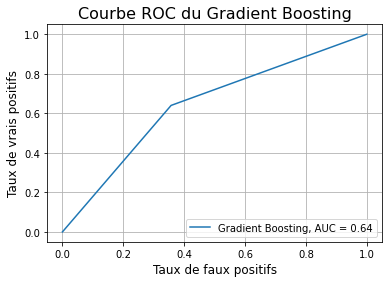

In [46]:
y_pred_proba3 = GB.predict_proba(X_test[selected_features])[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba3)
auc3 = metrics.roc_auc_score(Y_test, y_pred_proba3)

plt.plot(fpr, tpr, label="Gradient Boosting, AUC = {:.2f}".format(auc3))
plt.legend(loc="lower right")
plt.title('Courbe ROC du Gradient Boosting', fontsize=16)
plt.xlabel('Taux de faux positifs', fontsize=12)
plt.ylabel('Taux de vrais positifs', fontsize=12)
plt.grid(True)
plt.show()

In [47]:
# Calculer les taux de faux positifs et de vrais positifs
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba3)

# Calculer les scores en utilisant les taux de vrais positifs et les taux de faux positifs
scores = tpr - fpr

# Trouver l'indice du score maximum
best_index = np.argmax(scores)

# Obtenir le seuil de classification correspondant au score maximum
best_threshold = thresholds[best_index]

# Afficher les scores individuellement
for score, threshold in zip(scores, thresholds):
    print("Score : {:.2f}, Seuil : {:.2f}".format(score, threshold))

# Afficher le score maximum et le seuil correspondant
print("Meilleur score : {:.2f}".format(scores[best_index]))
print("Seuil correspondant : {:.2f}".format(best_threshold))

Score : 0.00, Seuil : 1.53
Score : 0.28, Seuil : 0.53
Score : 0.00, Seuil : 0.20
Meilleur score : 0.28
Seuil correspondant : 0.53


Precision : 0.52
Recall : 0.64
Accuracy rate:  0.6417910447761194
Error rate:  0.35820895522388063
F1_score:  0.5714285714285714
CK: 0.26975476839237056
MC: 0.27436562775947815
AUC: 0.6414285714285715


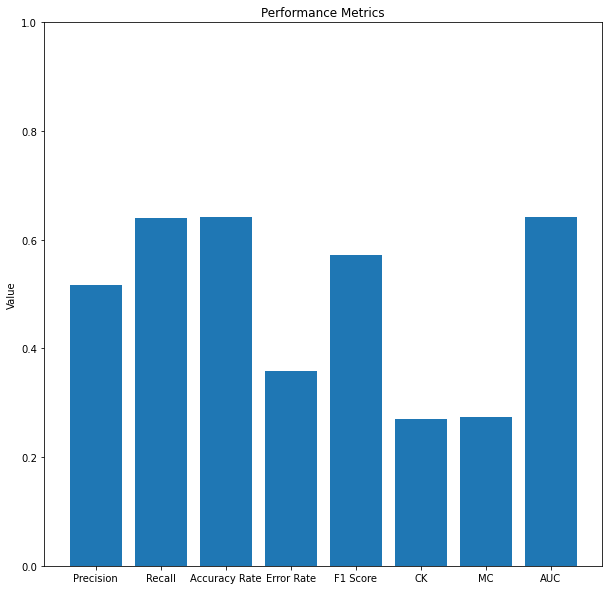

In [48]:
Accuracy_Rate3 = accuracy_score(Y_test, Y_pred3)
Error_rate3 = 1 - Accuracy_Rate3
F1_score3 = f1_score(Y_test, Y_pred3)
Precision3 = precision_score(Y_test, Y_pred3)
Recall3 = recall_score(Y_test, Y_pred3)
CK3 = cohen_kappa_score (Y_test,Y_pred3)
MC3 = matthews_corrcoef(Y_test,Y_pred3)
auc3 = metrics.roc_auc_score(Y_test, y_pred_proba3)

print("Precision : {:.2f}".format(Precision3))
print("Recall : {:.2f}".format(Recall3))
print("Accuracy rate: ", Accuracy_Rate3)
print("Error rate: ",Error_rate3)
print("F1_score: ", F1_score3)
print("CK:", CK3)
print("MC:", MC3)
print("AUC:", auc3)


# create a list of metric names and values
metric_names = ["Precision", "Recall", "Accuracy Rate", "Error Rate", "F1 Score", "CK", "MC","AUC"]
metric_values = [Precision3, Recall3, Accuracy_Rate3, Error_rate3, F1_score3, CK3, MC3,auc3]

# create a bar chart
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(metric_names, metric_values)
ax.set_ylabel('Value')
ax.set_ylim([0,1])
ax.set_title('Performance Metrics')
plt.show()

# Comparaison des courbes roc

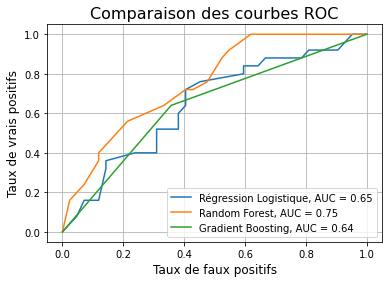

In [49]:
# Calculer les taux de faux positifs et les taux de vrais positifs pour chaque modèle
fpr_rl, tpr_rl, _ = metrics.roc_curve(Y_test, y_pred_proba1)
fpr_rf, tpr_rf, _ = metrics.roc_curve(Y_test, y_pred_proba2)
fpr_gb, tpr_gb, _ = metrics.roc_curve(Y_test, y_pred_proba3)

# Calculer les aires sous la courbe (AUC) pour chaque modèle
auc_rl = metrics.roc_auc_score(Y_test, y_pred_proba1)
auc_rf = metrics.roc_auc_score(Y_test, y_pred_proba2)
auc_gb = metrics.roc_auc_score(Y_test, y_pred_proba3)

# Tracer les courbes ROC pour chaque modèle
plt.plot(fpr_rl, tpr_rl, label="Régression Logistique, AUC = {:.2f}".format(auc_rl))
plt.plot(fpr_rf, tpr_rf, label="Random Forest, AUC = {:.2f}".format(auc_rf))
plt.plot(fpr_gb, tpr_gb, label="Gradient Boosting, AUC = {:.2f}".format(auc_gb))

# Afficher la légende et les titres
plt.legend(loc="lower right")
plt.title('Comparaison des courbes ROC', fontsize=16)
plt.xlabel('Taux de faux positifs', fontsize=12)
plt.ylabel('Taux de vrais positifs', fontsize=12)
plt.grid(True)

# Afficher le graphique
plt.show()

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, roc_auc_score

# Afficher les métriques
print("Métriques pour Régression Logistique :")
print("Accuracy rate: {:.2f}".format(Accuracy_Rate1))
print("Error rate: {:.2f}".format(Error_rate1))
print("Precision: {:.2f}".format(Precision1))
print("Recall: {:.2f}".format(Recall1))
print("F1 Score: {:.2f}".format(F1_score1))
print("CK: {:.2f}".format(CK1))
print("MC: {:.2f}".format(MC1))
print("AUC: {:.2f}".format(auc1))
print()

print("Métriques pour Random Forest :")
print("Accuracy rate: {:.2f}".format(Accuracy_Rate2))
print("Error rate: {:.2f}".format(Error_rate2))
print("Precision: {:.2f}".format(Precision2))
print("Recall: {:.2f}".format(Recall2))
print("F1 Score: {:.2f}".format(F1_score2))
print("CK: {:.2f}".format(CK2))
print("MC: {:.2f}".format(MC2))
print("AUC: {:.2f}".format(auc2))
print()

print("Métriques pour Gradient Boosting :")
print("Accuracy rate: {:.2f}".format(Accuracy_Rate3))
print("Error rate: {:.2f}".format(Error_rate3))
print("Precision: {:.2f}".format(Precision3))
print("Recall: {:.2f}".format(Recall3))
print("F1 Score: {:.2f}".format(F1_score3))
print("CK: {:.2f}".format(CK3))
print("MC: {:.2f}".format(MC3))
print("AUC: {:.2f}".format(auc3))
print()

Métriques pour Régression Logistique :
Accuracy rate: 0.63
Error rate: 0.37
Precision: 0.50
Recall: 0.40
F1 Score: 0.44
CK: 0.17
MC: 0.17
AUC: 0.65

Métriques pour Random Forest :
Accuracy rate: 0.67
Error rate: 0.33
Precision: 0.67
Recall: 0.24
F1 Score: 0.35
CK: 0.19
MC: 0.24
AUC: 0.75

Métriques pour Gradient Boosting :
Accuracy rate: 0.64
Error rate: 0.36
Precision: 0.52
Recall: 0.64
F1 Score: 0.57
CK: 0.27
MC: 0.27
AUC: 0.64



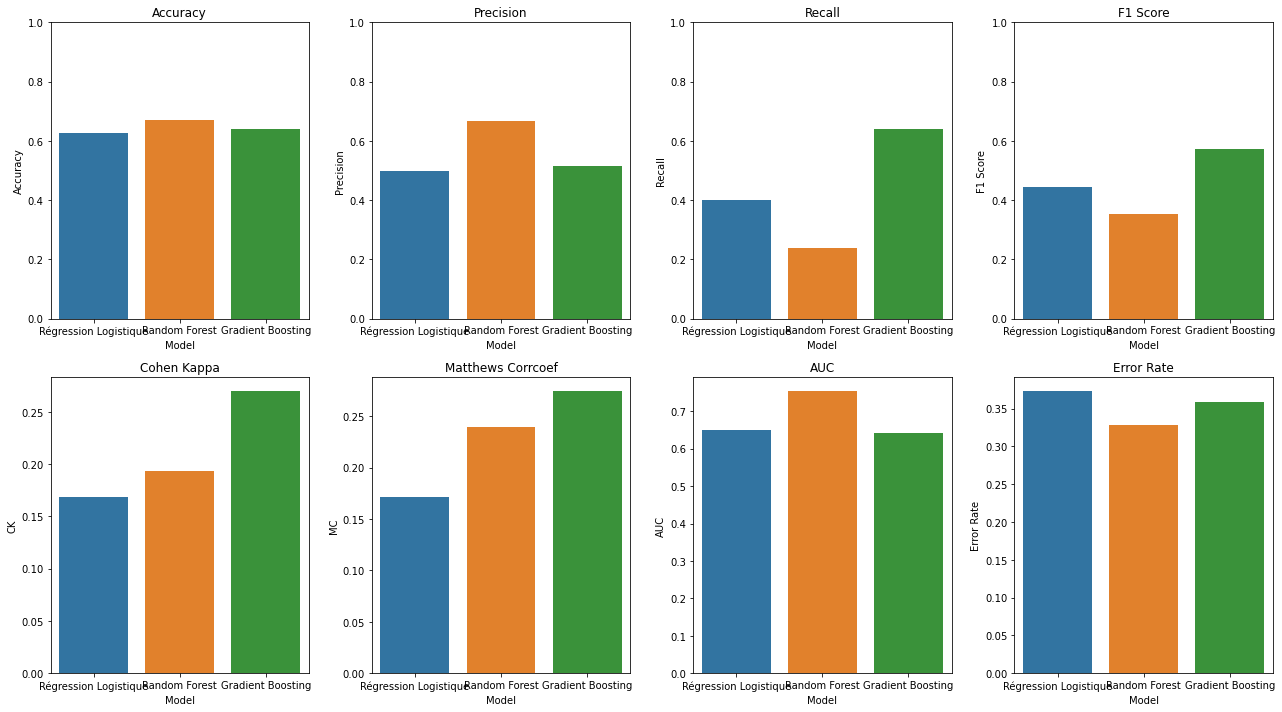

In [51]:
# Calculer les métriques pour chaque modèle

Accuracy_Rate3 = accuracy_score(Y_test, Y_pred3)
Error_rate3 = 1 - Accuracy_Rate3
F1_score3 = f1_score(Y_test, Y_pred3)
Precision3 = precision_score(Y_test, Y_pred3)
Recall3 = recall_score(Y_test, Y_pred3)
CK3 = cohen_kappa_score (Y_test,Y_pred3)
MC3 = matthews_corrcoef(Y_test,Y_pred3)
auc3 = metrics.roc_auc_score(Y_test, y_pred_proba3)



metrics_rl = {
    'Model': 'Régression Logistique',
    'Accuracy': Accuracy_Rate1,
    'Precision': Precision1,
    'Recall':Recall1,
    'F1 Score':F1_score1,
    'CK':CK1,
    'MC': MC1,
    'AUC':auc1,
    'Error Rate':Error_rate1
}

metrics_rf = {
    'Model': 'Random Forest',
   'Accuracy': Accuracy_Rate2,
    'Precision': Precision2,
    'Recall':Recall2,
    'F1 Score':F1_score2,
    'CK':CK2,
    'MC': MC2,
    'AUC':auc2,
    'Error Rate':Error_rate2
}

metrics_gb = {
    'Model': 'Gradient Boosting',
    'Accuracy': Accuracy_Rate3,
    'Precision': Precision3,
    'Recall':Recall3,
    'F1 Score':F1_score3,
    'CK':CK3,
    'MC': MC3,
    'AUC':auc3,
    'Error Rate':Error_rate3
}

# Créer un dataframe avec les métriques
metrics_df = pd.DataFrame([metrics_rl, metrics_rf, metrics_gb])

# Ploter les métriques
plt.figure(figsize=(18, 10))

# Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Accuracy')
plt.ylim(0, 1)

# Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.title('Precision')
plt.ylim(0, 1)

# Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.title('Recall')
plt.ylim(0, 1)

# F1 Score
plt.subplot(2, 4, 4)
sns.barplot(x='Model', y='F1 Score', data=metrics_df)
plt.title('F1 Score')
plt.ylim(0, 1)

# Cohen Kappa
plt.subplot(2, 4, 5)
sns.barplot(x='Model', y='CK', data=metrics_df)
plt.title('Cohen Kappa')

# Matthews Corrcoef
plt.subplot(2, 4, 6)
sns.barplot(x='Model', y='MC', data=metrics_df)
plt.title('Matthews Corrcoef')

# AUC
plt.subplot(2, 4, 7)
sns.barplot(x='Model', y='AUC', data=metrics_df)
plt.title('AUC')

# Error Rate
plt.subplot(2, 4, 8)
sns.barplot(x='Model', y='Error Rate', data=metrics_df)
plt.title('Error Rate')

plt.tight_layout()
plt.show()

# Maitriser 

### Accuracy (Taux de précision) 

Formule mathématique : Accuracy = (TP + TN) / (TP + TN + FP + FN)
L'Accuracy mesure la proportion de prédictions correctes parmi toutes les prédictions effectuées. Elle donne une idée globale de la performance du modèle en termes de prédictions correctes.
La valeur de référence est généralement la proportion d'exemples de la classe majoritaire dans l'ensemble de données. Par exemple, si 70% des exemples appartiennent à la classe A et 30% à la classe B, alors l'accuracy de prédire toujours la classe majoritaire serait de 0,70.

### Error Rate (Taux d'erreur) :

Formule mathématique : Error Rate = 1 - Accuracy
Le taux d'erreur mesure la proportion d'erreurs de classification commises par le modèle parmi toutes les prédictions effectuées. Il est complémentaire à l'Accuracy, fournissant une autre perspective sur la performance du modèle.
Un Error Rate de zéro (0) signifierait qu'aucune erreur de prédiction n'a été commise par le modèle, ce qui indiquerait une performance parfaite. Cependant, dans la pratique, il est rare d'atteindre un Error Rate de zéro, car les modèles de classification ne sont pas parfaits et peuvent toujours commettre des erreurs.
L'objectif est de réduire autant que possible l'Error Rate et de s'approcher le plus possible de zéro. Une valeur plus proche de zéro indique une meilleure performance du modèle, car cela signifie qu'il commet moins d'erreurs de prédiction.

### Precision (Précision) :

Formule mathématique : Precision = TP / (TP + FP)
La Precision mesure la proportion de prédictions positives correctes parmi toutes les prédictions positives effectuées. Elle met l'accent sur la capacité du modèle à éviter les faux positifs.
La valeur de référence est souvent la précision associée à un classifieur qui prédit toujours la classe majoritaire. Dans l'exemple précédent, la précision pour prédire la classe majoritaire serait de 0,70.

### Recall (Rappel) : SENSIBILITE

Formule mathématique : Recall = TP / (TP + FN)

Le Recall appelé Sensibilité ou Taux de Vrais Positifs mesure la proportion de vrais positifs correctement identifiés parmi tous les vrais positifs réels. Il met l'accent sur la capacité du modèle à éviter les faux négatifs.La valeur de référence est généralement le rappel associé à un classifieur qui prédit toujours la classe minoritaire. 
Dans l'exemple précédent, le rappel pour prédire la classe minoritaire serait de 1,00.

### F1 Score :

Formule mathématique : F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
Le F1 Score est une métrique qui combine la Precision et le Recall en une seule valeur. Il donne une mesure de l'équilibre entre la Precision et le Recall.
La valeur de référence est souvent le F1 Score associé à un classifieur qui prédit toujours la classe majoritaire. Dans l'exemple précédent, le F1 Score pour prédire la classe majoritaire serait de 0,82.

### Cohen's Kappa (Kappa de Cohen) :

Formule mathématique : Kappa = (observed_accuracy - expected_accuracy) / (1 - expected_accuracy)
Le Kappa de Cohen est une mesure de la concordance entre les prédictions du modèle et les observations réelles, corrigée pour tenir compte de la concordance due au hasard. Il tient compte de la possibilité d'accord simplement dû au hasard.
 Il n'y a pas de valeur de référence spécifique pour le kappa de Cohen. Cependant, une interprétation courante est que 0 représente un accord au hasard et 1 représente un accord parfait

### Matthews Correlation Coefficient (Coefficient de corrélation de Matthews) :

Formule mathématique : MCC = (TP * TN - FP * FN) / sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
Le MCC est une mesure de la qualité globale des prédictions du modèle, prenant en compte les quatre éléments de la matrice de confusion. Il est particulièrement utile lorsque les classes sont déséquilibrées.
Il n'y a pas de valeur de référence spécifique pour le coefficient de corrélation de Matthews. Cependant, une interprétation courante est que -1 représente une prédiction complètement incorrecte, 0 représente une prédiction au hasard et 1 représente une prédiction parfaite.

### AUC (Area Under the ROC Curve) :

L'AUC mesure la capacité du modèle à distinguer entre les classes positives et négatives. Il représente la probabilité qu'un exemple positif choisi au hasard par le modèle soit classé avec un score plus élevé que celui d'un exemple négatif choisi au hasard. Une valeur d'AUC proche de 1 indique une bonne capacité de discrimination du modèle.
La valeur de référence pour l'AUC est généralement 0,5 qui correspond à une prédiction aléatoire. Un modèle avec un AUC supérieur à 0,5 est considéré comme meilleur que le hasard, tandis qu'un AUC de 1 indique une prédiction parfaite.

 ### AUC (Area Under the ROC Curve) :

La formule mathématique de l'AUC (Area Under the ROC Curve) est basée sur la construction de la courbe ROC (Receiver Operating Characteristic). La courbe ROC représente la relation entre le taux de vrais positifs (Sensibilité) et le taux de faux positifs (1 - Spécificité) pour différents seuils de classification.

Pour calculer l'AUC, on utilise la règle trapezoïdale pour approximer l'aire sous la courbe ROC. La formule mathématique est la suivante :

AUC = ∑ [ (FP[i+1] - FP[i]) * (TP[i+1] + TP[i]) / 2 ]

où FP[i] représente le taux de faux positifs à l'indice i (i.e., 1 - spécificité) et TP[i] représente le taux de vrais positifs à l'indice i (i.e., sensibilité).

La formule calcule la somme des aires des trapèzes formés par chaque paire de points consécutifs de la courbe ROC. Chaque trapèze a une base égale à la différence entre les taux de faux positifs, et une hauteur égale à la moyenne des taux de vrais positifs.

L'AUC est une valeur comprise entre 0 et 1. Une valeur de 0,5 indique un modèle qui prédit au hasard, tandis qu'une valeur de 1 indique un modèle parfait qui classe correctement tous les exemples.

L'AUC est couramment utilisée pour évaluer la performance des modèles de classification, en particulier dans les problèmes où les classes sont déséquilibrées ou lorsque le seuil de classification optimal est inconnu. Une valeur d'AUC plus élevée indique une meilleure capacité de discrimination du modèle entre les classes positives et négatives.